In [1]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/CornelliusYW/Building_and_Evaluating_ML/refs/heads/master/churn.csv")
df.head()

,Age,AnnualIncome,Gender,MembershipDuration,Location,Churn
0,55,79645.11,Male,4,Urban,0
1,50,42648.21,Male,2,Rural,0
2,54,87496.12,Female,4,Urban,0
3,44,29755.95,Female,6,Urban,0
4,50,97709.25,Male,3,Suburban,0


In [3]:
df.describe()

,Age,AnnualIncome,MembershipDuration,Churn
count,200.000000,200.000000,200.000000,200.000000
mean,38.225000,56478.222450,4.985000,0.050000
std,12.125988,26165.609965,2.603588,0.218492
min,18.000000,10021.380000,1.000000,0.000000
25%,27.000000,34411.875000,3.000000,0.000000
50%,40.000000,56968.085000,5.000000,0.000000
75%,48.250000,77545.160000,7.000000,0.000000
max,59.000000,99941.810000,9.000000,1.000000


In [4]:
df.isnull().value_counts()

Age    AnnualIncome  Gender  MembershipDuration  Location  Churn
False  False         False   False               False     False    200
Name: count, dtype: int64

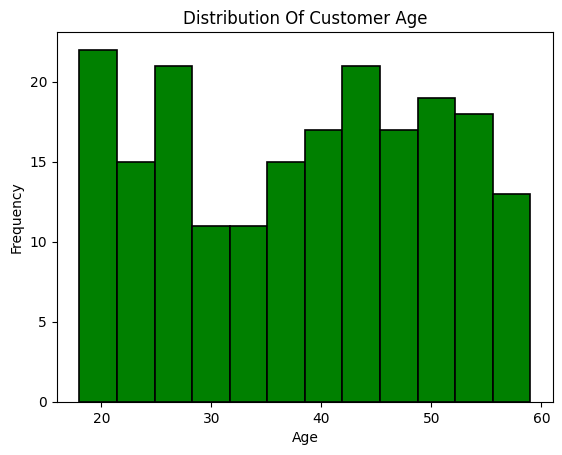

In [5]:
ax = df['Age'].plot.hist(title="Distribution Of Customer Age", bins=12, color='green', edgecolor='black', linewidth=1.2)
ax.set_xlabel("Age")
plt.show()

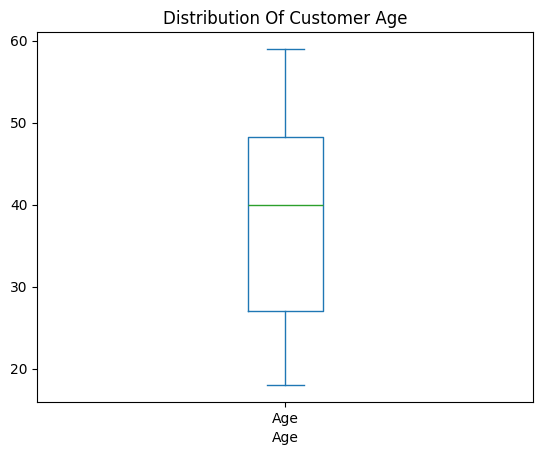

In [6]:
ax = df['Age'].plot.box(title="Distribution Of Customer Age")
ax.set_xlabel("Age")
plt.show()

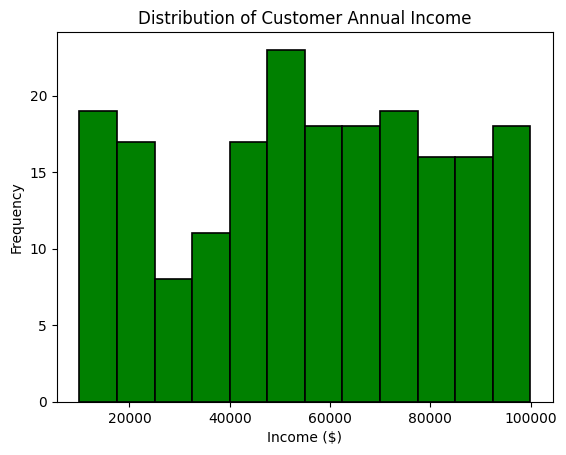

In [7]:
ax = df['AnnualIncome'].plot.hist(title="Distribution of Customer Annual Income",  bins=12, color='green', edgecolor='black', linewidth=1.2)
ax.set_xlabel("Income ($)")
plt.show()

In [8]:
def autopct_format(pct):
    total = len(df['Gender'])
    absolute = int(round(pct/100.*total))
    return f'{pct:.1f}%\n({absolute:d})'


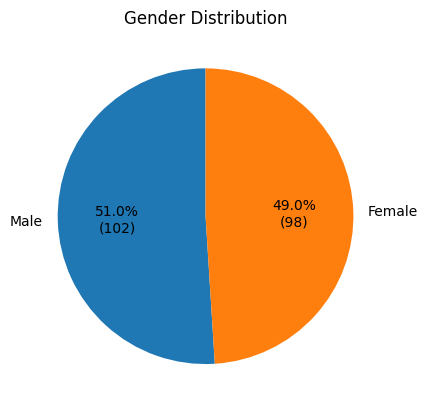

In [9]:
ax = df['Gender'].value_counts().plot.pie(autopct=autopct_format,startangle=90, title="Gender Distribution")
plt.ylabel('') 
plt.show()

In [10]:
df['MembershipDuration'].value_counts()

MembershipDuration
6    27
2    25
9    23
3    23
8    23
4    22
1    21
5    18
7    18
Name: count, dtype: int64

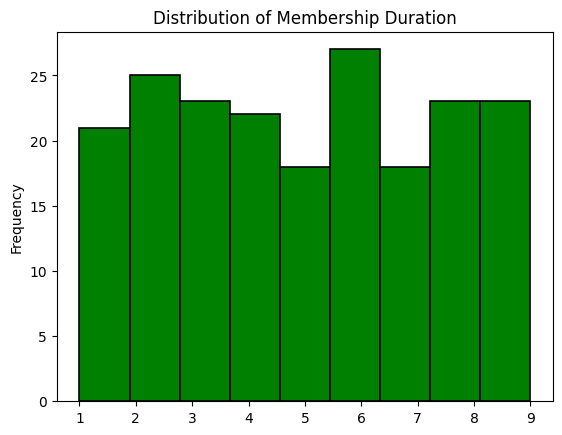

In [11]:
ax = df['MembershipDuration'].plot.hist(title="Distribution of Membership Duration",bins=max(df['MembershipDuration']),  color='green', edgecolor='black', linewidth=1.2)

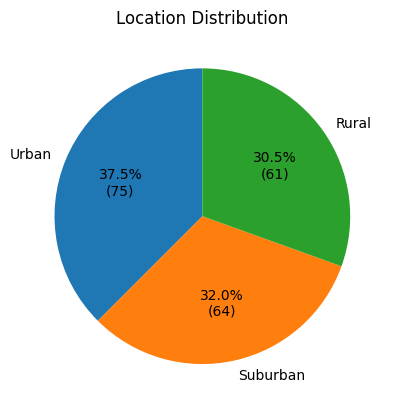

In [13]:
ax = df['Location'].value_counts().plot.pie(autopct=autopct_format,startangle=90, title="Location Distribution")
plt.ylabel('') 
plt.show()

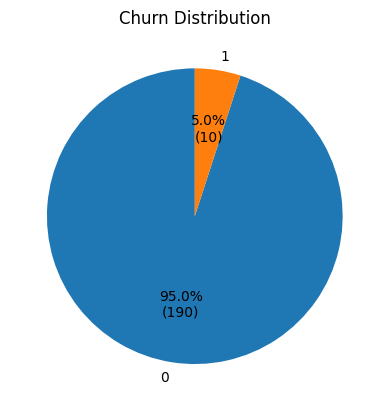

In [17]:
ax = df['Churn'].value_counts().plot.pie(autopct=autopct_format,startangle=90, title="Churn Distribution")
plt.ylabel('') 
plt.show()

In [18]:
label_encoder = LabelEncoder()

In [19]:
df['GenderEncode'] = label_encoder.fit_transform(df['Gender'])

In [20]:
df_encoded = pd.get_dummies(df, columns=['Location'], drop_first=False).drop('Gender', axis=1)
corr = df_encoded.corr()

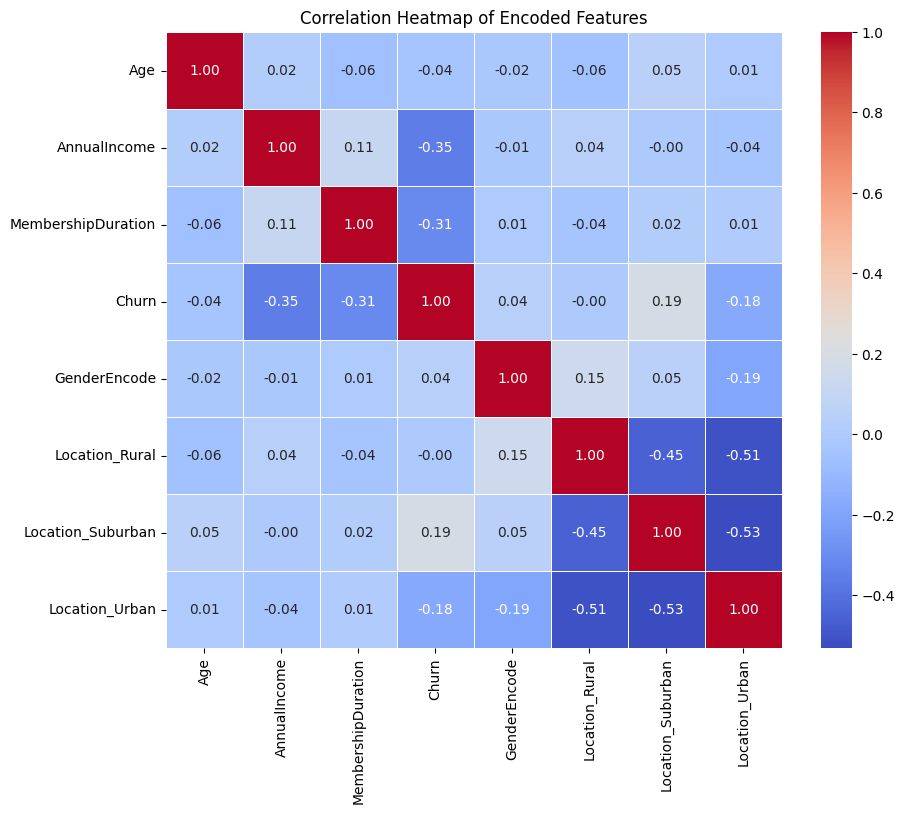

In [21]:
plt.figure(figsize=(10, 8))

sns.heatmap(corr, 
            annot=True,         
            fmt=".2f",           
            cmap='coolwarm',     
            square=True,         
            linewidths=0.5)      

plt.title('Correlation Heatmap of Encoded Features')
plt.show()

Tidak terjadi multicolinierity, tidak ada feature yang harus didrop
